# Проверка гипотез для увеличения выручки интернет-магазина

**Цель исследования -** проанализировать влияние проверяемых гипотез на выручку интернет-магазина. <br>
    
**Ход исследования:**
1. Приоритизация гипотез: предобработка данных, применение фреймворков ICE и RICE, объяснение получившихся результатов.
2. Анализ A/B-теста: предобработка данных, построение графиков, выбор границ для определения аномальных значений, вычисление статистической значимости различий в исследуемых показателях, принятие решения об остановке или продолжении теста.

**Описание данных:**
<ol> 
    <li>Датафрейм hypothesis:</li>
<ul>
<li>Hypothesis — краткое описание гипотезы;</li>
<li>Reach — охват пользователей по 10-балльной шкале;</li>
<li>Impact — влияние на пользователей по 10-балльной шкале;</li>
<li>Confidence — уверенность в гипотезе по 10-балльной шкале;</li>
<li>Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале: чем больше значение Efforts, тем дороже проверка гипотезы.</li> <br>
</ul>
    <li>Датафрейм orders:</li>
<ul>
<li> transactionId — идентификатор заказа;</li>
<li>visitorId — идентификатор пользователя, совершившего заказ;</li>
<li>date — дата, когда был совершён заказ;</li>
<li>revenue — выручка заказа;</li>
<li>group — группа A/B-теста, в которую попал заказ.</li><br>
</ul>
    <li>Датафрейм visitors:</li>
<ul>
<li>date — дата;</li>
<li>group — группа A/B-теста;</li>
<li>visitors — количество пользователей в указанную дату в указанной группе A/B-теста.</li>
</ul>

## Часть 1. Приоритизация гипотез.

### Предобработка данных

In [ ]:
#импортирую нужные библиотеки
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#добавляю файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

Для начала необходимо ознакомиться с датафреймом, который будет задействован в первой части исследования. 

In [ ]:
#проверяю первый датафрейм на дубликаты и смотрю типы данных
display(hypothesis.duplicated().sum())
display(hypothesis.info())

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Дубликаты не найдены, тип данных корректный во всех случаях, можно перейти к вычислению ICE и RICE.

### Применение фреймворка ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.

In [ ]:
#считаю показатель ICE для каждой гипотезы
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
#отображаю целиком формулировку гипотез
pd.options.display.max_colwidth = 120
display(hypothesis.sort_values(by='ICE',ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Наивысший показатель ICE у 9 (**Запустить акцию, дающую скидку на товар в день рождения**), 1 (**Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**) и 8 (**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**) гипотез за счет высоких значений Impact (влияние изменений на пользователей) и Confidence (уверенность в оценках остальных параметров), а также не самых высоких показателей Efforts (сложность проверки гипотезы).

### Применение фреймворка RICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.

In [ ]:
#считаю показатель RICE для каждой гипотезы
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis.sort_values(by='RICE',ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Исходя из показателей RICE, наиболее перспективными гипотезами являются 8 (**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**), 3 (**Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**) и 1 (**Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**). 9 гипотеза (**Запустить акцию, дающую скидку на товар в день рождения**), занимающая 1 место по параметру ICE, не вошла в топ приоритетных гипотез из-за минимального показателя Reach (охват пользователей). И, напротив, 3 гипотеза за счет высокого показателя Reach смогла войти в топ-3 приоритетных гипотез по показателю RICE, несмотря на довольно низкое значение Impact.

2 гипотезы вошли в топ-3 по перспективности в соответствии и с показателями ICE, и RICE, а именно 1 (**Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**) и 8 (**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**) гипотезы. Из-за низкого показателя Reach 9 гипотеза (**Запустить акцию, дающую скидку на товар в день рождения**) опустилась на 4 позиции в топе по показателю RICE по сравнению с ICE, тогда как 3 гипотеза (**Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**) за счет высокого показателя Reach наоборот поднялась с 5 на 2 место по перспективности.

## Часть 2. Анализ A/B-теста

### Предобработка данных

In [ ]:
#проверяю тип данных
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [ ]:
#переименовываю столбцы для удобства 
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [ ]:
#меняю тип данных у столбцов с датами с object на datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Для удобства пользования датафреймом поменяла названия некоторых столбцов, а также изменила тип данных в столбцах с датами с object на datetime.

Теперь исключим ситуацию, при которой в группы попали пользователи из разных временных промежутков. 

In [ ]:
#проверяю границы временных промежутков
display(visitors['date'].min())
display(visitors['date'].max())
display(orders['date'].min())
display(orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Проверим оба датафрейма на явные дублкаты.

In [ ]:
#ищу явные дубликаты
display(visitors.duplicated().sum())
display(orders.duplicated().sum())

0

0

Проверим наличие пользователей, попавших в обе группы.

In [ ]:
#ищу пользователей, попавших в обе группы
visitor_id_duplicates = orders.groupby('visitor_id').agg({'group':'nunique'}).query('group > 1').count()
display(visitor_id_duplicates)
display(visitor_id_duplicates / len(orders['visitor_id'].unique()))

group    58
dtype: int64

group    0.056256
dtype: float64

Обнаружилось 58 пользователей, попавших в обе группы, что составляет 5.6% от общего числа уникальных пользователей. Решим, что с ним делать, исходя из того, какую долю покупок совершили эти пользователи. 

In [ ]:
#определяю долю заказов, совершенных пользователями, попавшими в обе группы
duplicated_id = orders.groupby('visitor_id').agg({'group':'nunique'}).query('group > 1')
duplicated_id_list = duplicated_id.index.to_list()
display('Доля заказов, совершенных пользователями, которые попали в обе группы, составляет {:.1%}'\
        .format(len(orders.query('visitor_id in @duplicated_id_list')) / len(orders)))

'Доля заказов, совершенных пользователями, которые попали в обе группы, составляет 15.1%'

Несмотря на то, что 58 пользователей кажется небольшим числом, именно их заказы, как оказалось, составляют более 15% от общего числа заказов, так что удалить их из датафрейма не получится, так что оставляем их данные. 

### Построение графика кумулятивной выручки по группам

Для построения графиков необходимо создать датафрейм для сбора кумулятивных данных.

In [ ]:
#для начала выделяю уникальные пары значений дат и групп теста
groups_per_date = orders[['date','group']].drop_duplicates()
#высчитываю агрегированные кумулятивные данные о заказах 
orders_aggregated = groups_per_date.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#то же самое повторяю с данными о посетителях
visitors_aggregated = groups_per_date.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#объединяю данные в один датафрейм
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#display(cumulative_data)

Теперь переходим к построению графиков.

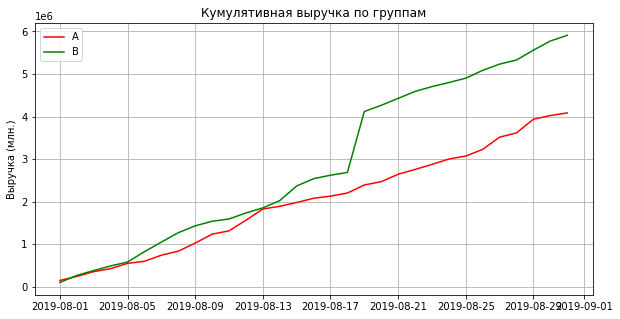

In [ ]:
#создаю датафрейм с кумулятивными даннными группы А
cumulative_revenue_group_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
#создаю датафрейм с кумулятивными даннными группы B
cumulative_revenue_group_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
#строю графики
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue_group_a['date'], cumulative_revenue_group_a['revenue'], label='A', color='red')
plt.plot(cumulative_revenue_group_b['date'], cumulative_revenue_group_b['revenue'], label='B', color = 'green')
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка (млн.)')
plt.grid(True)
plt.legend();

В первой половине месяца выручка обеих групп планомерно росла с преимуществом по показателям у группы B, далее произошел резкий скачок роста выручки у группы B, а к концу месяца рост выручки у обеих групп стабилизировался. Резкий рост выручки группы B может быть обусловлен рядом причин, в том числе аномально дорогими заказами или стремительным повышением количества заказов именно в группе B.

### Построение графика кумулятивного среднего чека по группам

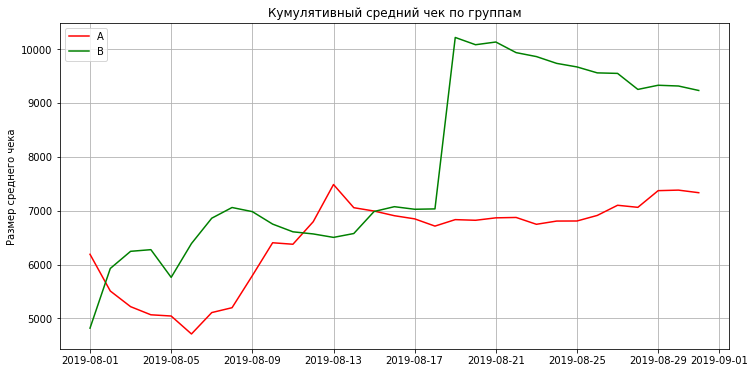

In [ ]:
#строю график кумулятивного среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_group_a['date'], cumulative_revenue_group_a['revenue']/cumulative_revenue_group_a['orders'], label='A', color='red')
plt.plot(cumulative_revenue_group_b['date'], cumulative_revenue_group_b['revenue']/cumulative_revenue_group_b['orders'], label='B', color='green')
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Размер среднего чека')
plt.grid(True)
plt.legend(loc='upper left');

Изменения значений среднего чека было крайне неравномерным и скачкообразным на протяжении первых трех недель августа, далее показатели относительно стабилизировались. Очевидно наличие дорогостоящих заказов в группе B во второй половине месяца. В группе А в первую неделю августа, наоборот, был заметный провал в размере среднего чека, который затем сменился на рост и стабилизацию показателей во второй половине месяца. В целом размер среднего чека группы A был почти всегда ниже, чем у группы B.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

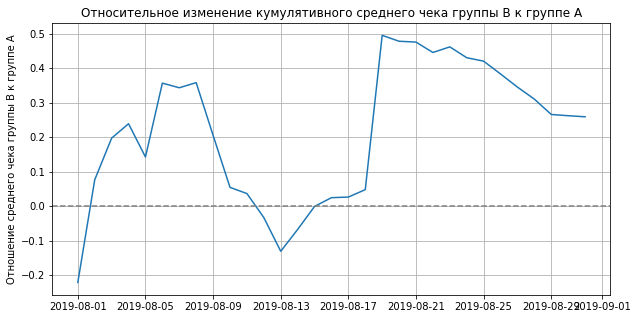

In [ ]:
#собираю данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_group_a.merge(cumulative_revenue_group_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#задаю размер графика
plt.figure(figsize=(10, 5))
#строю график
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='grey', linestyle='--')
plt.ylabel('Отношение среднего чека группы B к группе А')
plt.grid(True)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A');

На протяжении всего анализируемого периода отношение средних чеков двух групп значительно меняется, на графике видно сразу несколько резких скачков и один провал. Как и предыдущие графики, данный график наводит на мысли об аномально дорогих заказах, наличие которых мы проверим в дальнейшем. 

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

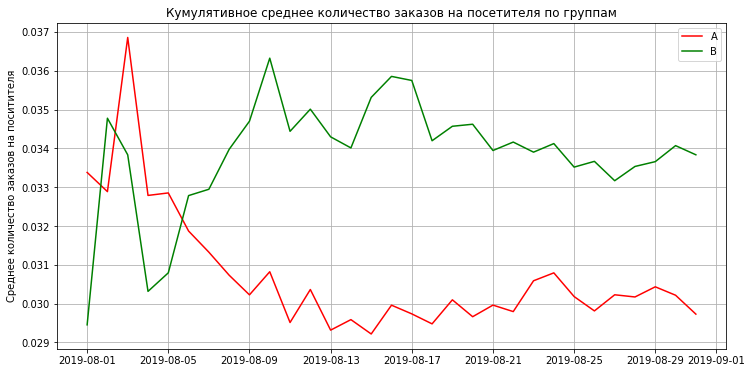

In [ ]:
#считаю кумулятивное среднее количество заказов на посетителя
cumulative_data['avg_orders_per_visitor'] = cumulative_data['orders']/cumulative_data['visitors']
# отделяю данные по группам
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
# строю график
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['avg_orders_per_visitor'], label='A', color='red')
plt.plot(cumulative_data_b['date'], cumulative_data_b['avg_orders_per_visitor'], label='B', color='green')
plt.ylabel('Среднее количество заказов на поситителя')
plt.grid(True)
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend();

После резкого всплеска среднего количества заказов в группе А в первых числах августа началось стремительное падение этого показателя, после чего можно наблюдать незначительные колебания на протяжении оставшегося времени. По сравнению с группой A, кумулятивное среднее количество заказов на посетителя в группе B показывает намного более позитивные результаты: несмотря на серьезный провал в анализируемом показателе в середине первой недели августа, далее можно наблюдать стремительный рост значений и, хотя скачки роста и падения наблюдаются до конца августа, несомненно показатели у группы B намного лучше, чем у группы A.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

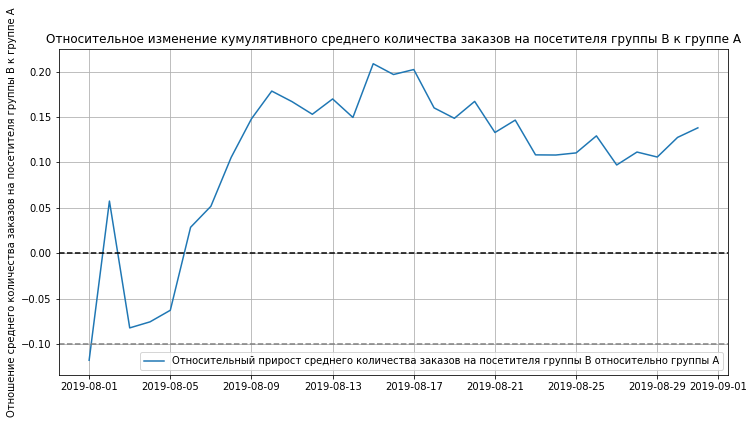

In [ ]:
#строю график
merged_cumulative_data = cumulative_data_a[['date','avg_orders_per_visitor']].merge(cumulative_data_b[['date','avg_orders_per_visitor']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_data['date'], merged_cumulative_data['avg_orders_per_visitorB']/merged_cumulative_data['avg_orders_per_visitorA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.ylabel('Отношение среднего количества заказов на посетителя группы B к группе A')
plt.grid(True)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A');

Если в первую неделю августа были заметны колебания, и на некоторое непродолжительное время группа А вырвалась вперед, то начиная со второй недели группа B стабильно лидировала, что и отражено на графике. Таким образом, на протяжении большей части рассматриваемого периода показатель перехода посетителя в покупателя у группы B был значительно выше, чем у группы А.

### Построение точечного графика количества заказов по пользователям

In [ ]:
#для начала построю таблицу с количеством заказов, совершенных каждым уникальным пользователем
orders_by_users = (   
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(15))

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Максимальное количество заказов, совершенных одним пользователем, - 11, и всего было два клиента, совершивших за август такое количество заказов. Также один клиент совершил 9 заказов и еще один - 8. 

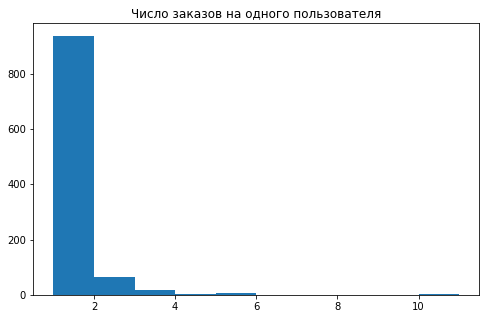

In [ ]:
#строю график
plt.figure(figsize=(8, 5))
plt.hist(orders_by_users['orders'])
plt.title('Число заказов на одного пользователя');

Абсолютное большинство клиентов сделало только один заказ, но также есть заметное количество покупателей, совершивших от 2 до 4 покупок. Кроме этого, видно небольшое количество людей, совершивших более 4 заказов. 

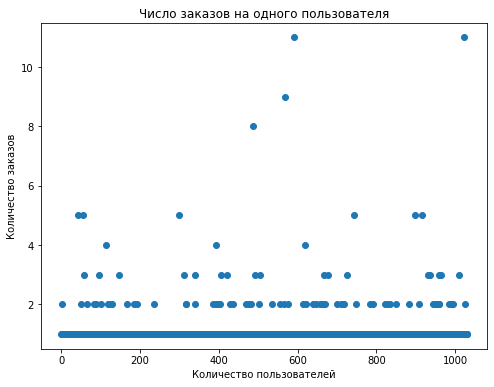

In [ ]:
#строю точечную диаграмму числа заказов на одного пользователя
plt.figure(figsize=(8, 6))
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Число заказов на одного пользователя');

На точечной диаграмме также видно, что большинство клиентов совершило 1 заказ, также заметное число пользователей совершило от 2 до 4 заказов. После этого значения количество пользователей существенно сокращается, и мы видим лишь единичные случаи совершения более 4 заказов одним пользователем.  

### Расчет 95-ого и 99-ого перцентилей количества заказов на пользователя

In [ ]:
#считаю 95-й и 99-й перцентили количества заказов на пользователя
orders_percentile_95 = np.percentile(orders_by_users['orders'], 95)
orders_percentile_99 = np.percentile(orders_by_users['orders'], 99)
display(orders_percentile_95)
display(orders_percentile_99)

2.0

4.0

5% пользователей совершило более 2 заказов, и лишь 1% - более 4. Для того, чтобы избежать потери данных и снижения точности результатов тестирования, выберем максимально высокую границу для определения выбросов - 4 заказа, пользователей с большим количеством заказов будем считать аномальными случаями. 

### Построение точечного графика стоимостей заказов

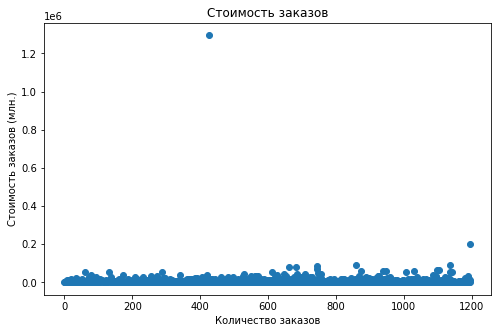

In [ ]:
#строю график
plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов (млн.)')
plt.title('Стоимость заказов');

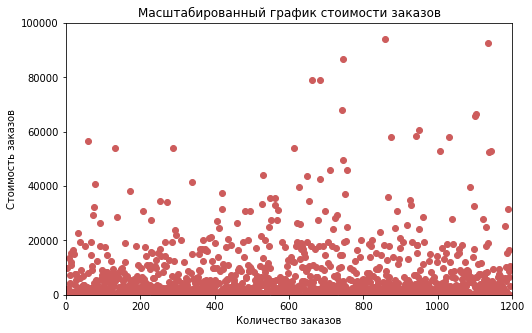

In [ ]:
#строю график
plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='indianred')
ax = plt.gca()
ax.set_xlim([0,1200])
ax.set_ylim([0,100000])
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.title('Масштабированный график стоимости заказов');

Абсолютное большинство заказов не дороже 50.000 рублей. Есть 2 однозначно аномальных значения, видных на графике, заказы дороже 200.000 и 1.200.000. 

### Расчет 95-ого и 99-ого перцентилей стоимости заказов

In [ ]:
#считаю 95-й и 99-й перцентили стоимости заказов
revenue_percentile_95 = np.percentile(orders['revenue'], 95)
revenue_percentile_99 = np.percentile(orders['revenue'], 99)
display(revenue_percentile_95.round(1))
display(revenue_percentile_99.round(1))

28000.0

58233.2

5% заказов оказалось дороже 28000 рублей, и 1% покупателей сделали заказ на сумму более 58233.
Так же как и в предыдущем случае целесообразным кажется выбор верхней границы по 99-ому перцентилю, поэтому будем считать аномальными заказы дороже 58233.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий двух параметров между группами по «сырым» и «очищенным» данным: различия в среднем количестве заказов на посетителя и различия в сумме среднего чека. <br>
Так как мы выяснили, что в сырых данных имеются выбросы, для расчета статистической значимости различий сравниваемых параметров в данном случае целесообразнее всего использовать непараметрический тест Манна-Уитни, для проведения которого необходимо будет составить два ранжированных списка значений. <br>
В каждом случае за нулевую гипотезу принимаем утверждение о том, что различий между сравниваемыми параметрами не имеется, за альтернативную - наличие различий. <br>
Определим уровень значимости для гипотезы - 5%, то есть alpha = 0.05.

H0: Различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет. <br>
H1: Различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

In [ ]:
#считаю количество пользователей по дням в каждой из групп 
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

#считаю количество заказов для каждого пользователя в обеих группах
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

#для проведения теста Манна-Уитни создаю таблицы sampleA и sampleB, в каждой из которых пользователям 
#из проверяемой группы будет соответствовать количество заказов, а в случае отсутствия заказов, будет стоять 0
sampleA = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#проверяю нулевую гипотезу
display('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#считаю относительный прирост среднего количества заказов на пользователя группы B к группе A
display('Относительный прирост среднего количества заказов на пользователя группы B к группе A: {0:.1%}'.format(sampleB.mean() / sampleA.mean() - 1))


'p-value: 0.017'

'Относительный прирост среднего количества заказов на пользователя группы B к группе A: 13.8%'

Нулевая гипотеза о равенстве среднего количества заказов на пользователя в обеих группах отвергнута, таким образом, подтверждается альтернативная гипотеза, согласно которой различия есть. Прирост среднего количества заказов в группе B относительно группы A составляет 13.8%. Теперь необходимо проверить, как изменятся показания после очистки данных от аномальных значений. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

H0: Различий в среднем чеке заказа между группами по «сырым» данным нет. <br>
H1: Различия в среднем чеке заказа между группами по «сырым» данным есть.

In [ ]:
display('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('Относительный прирост суммы среднего чека группы B к группе A: {0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-value: 0.729'

'Относительный прирост суммы среднего чека группы B к группе A: 25.9%'

В результате проверки по «сырым» данным нулевая гипотеза не может быть отвергнута, соответственно статистически значимого различия в среднем чеке заказа между группами не обнаружено. При этом относительный прирост суммы среднего чека группы B к группе A: 25.9%, то есть по «сырым» данным средний чек группы B значительно выше среднего чека группы A.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Теперь перейдем к проверке очищенных от выбросов данных. Для начала узнаем количество пользователей с аномально большим количеством и суммой заказов.

In [ ]:
#вычисляю количество пользователей с аномальными показателями
abnormal_num_of_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > orders_percentile_99]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > orders_percentile_99]['visitor_id'],
    ],
    axis=0,
)
abnormal_sum_of_orders = orders[orders['revenue'] > revenue_percentile_99]['visitor_id']
abnormal_visitors = (
    pd.concat([abnormal_num_of_orders, abnormal_sum_of_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_visitors.shape[0])

15

Получается, что в наших данных есть 15 пользователей с аномальными показателями. Проверим, как их данные влияли на результаты расчетов. 

H0: Различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет. <br>
H1: Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

In [ ]:
#очищаю данные
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
display('Относительный прирост среднего количества заказов на пользователя группы B к группе A: {0:.1%}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

'p-value: 0.014'

'Относительный прирост среднего количества заказов на пользователя группы B к группе A: 15.3%'

Как и в случае с «сырыми» данным, в результате проверки по «очищенным» данным нулевая гипотеза, согласно которой различий в среднем количестве заказов на посетителя между группами нет, отвергнута. Относительный прирост среднего количества заказов на пользователя группы B к группе A после очистки данных от аномалий даже увеличился на полтора процента, что позволяет сделать вывод о том, что выбросы в большем количестве пришлись на группу A. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

H0: Различий в среднем чеке заказа между группами по «очищенным» данным нет. <br>
H1: Различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [ ]:
display('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', \
                  np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),)]['revenue'], \
                  orders[np.logical_and(orders['group'] == 'B', \
                  np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),)]['revenue'],)[1]))

display('Относительный прирост суммы среднего чека группы B к группе A: {0:.1%}'.format(orders[np.logical_and(orders['group'] == 'B', \
                  np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),)]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', \
                  np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),)]['revenue'].mean() - 1))

'p-value: 0.851'

'Относительный прирост суммы среднего чека группы B к группе A: -0.6%'

Проверка статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным, так же как и по «сырым» данным, показала, что статистически значимых различий между средними чеками обеих групп нет, нулевая гипотеза отвергнута. Однако, в отличие от результатов расчетов по «сырым» данным, в данном случае относительный прирост суммы среднего чека группы B к группе A не просто снизился, а даже достиг хоть и небольшого, но отрицательного значения, что позволяет сделать вывод о значительном количестве аномалий, повлиявших на сумму среднего чека, именно в группе B.

### Принятие решения по результатам теста 

В первой части исследования была проведена приоритизация гипотез с помощью фреймворков ICE и RICE. В результате 2 гипотезы вошли в оба топ-3: гипотеза №1 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) и гипотеза №8 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Эти гипотезы представляются наиболее перспективными и приоритетными для дальнейшей работы с ними. <br>

В результате проверки статистической значимости различий между группами в среднем количестве заказов на посетителя и в среднем чеке заказа при использовании сначала «сырых», а затем «очищенных» данных, были сделаны следующие выводы:<br> 
    1.  Есть статистическое различие в среднем количестве заказов на посетителя с однозначным преимуществом у группы B.<br>
    2. Не найдено статистического различия в сумме среднего чека каждой из групп. <br>
    
**Так как целью данного исследования является увеличение выручки интернет-магазина, целесообразно остановить тест и признать победу группы B по показателю среднего количества заказов на посетителя.**

*Отдельно стоит отметить, что в рамках данного исследования были использованы данные, включающие 58 пользователей, входящих в обе группы, что могло исказить результаты расчетов.*